In [14]:
using Pkg
envpath = expanduser("~/envs/d12reg/")
Pkg.activate(envpath)

  Activating project at `~/envs/d12reg`


In [15]:
# libs
using Plots; gr()
using Images
using CSV
using JLD2
include("functions.jl")

get_learndatalogs (generic function with 1 method)

In [16]:
mainpath = expanduser("./")

path = mainpath * "tblogs/kdmobileunet/frontend/_1/"
t, v, m = get_learndatalogs(path)
frontend_trainloss = t
frontend_validloss = v

path = mainpath * "tblogs/kdmobileunet/backend/_1/"
t, v, m = get_learndatalogs(path)
backend_trainloss = t
backend_validloss = v

path = mainpath * "tblogs/kdmobileunet/tuning/_1/"
t, v, m = get_learndatalogs(path)
tuning_trainloss = t
tuning_validloss = v;

In [17]:
# ylimsfront not needed
ylimsback = (0.0, 0.65)
ylimstune = (0.0, 0.25)

ylabelfront = "Distillation loss"
ylabelback  = "Segmentation loss"
ylabeltune  = "Segmentation loss"

"Segmentation loss"

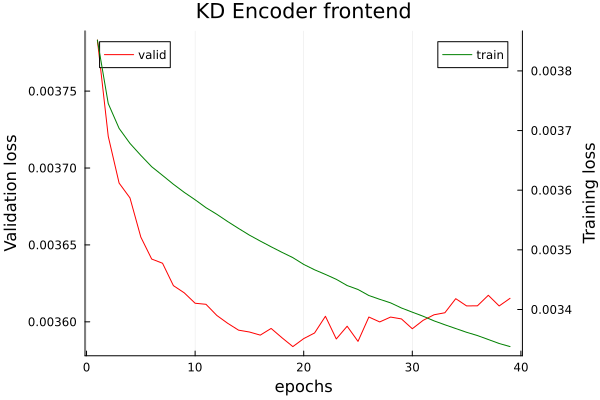

In [18]:
p = plot(frontend_validloss, color=:red, label="valid", linestyle=:solid)
plot!(legend=:topleft)
title!("KD Encoder frontend")
xlabel!("epochs")
ylabel!("Validation loss")

plot!(twinx(), frontend_trainloss, color=:green, label="train", linestyle=:solid,
    legend=:topright,
    ylabel="Training loss")
display(p)
# savefig(p, "./kd-mobileunet-encoder-frontend.png")

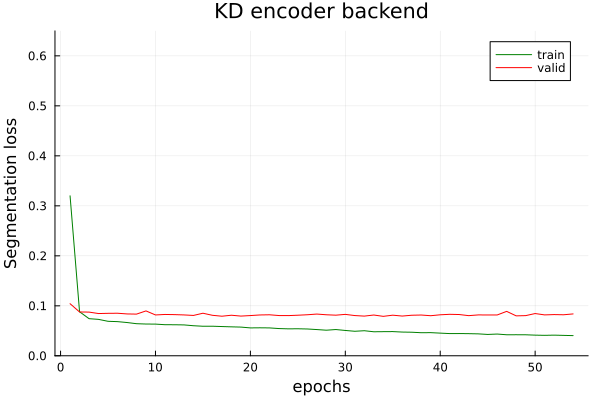

In [19]:
p = plot(backend_trainloss, color=:green, label="train", linestyle=:solid)
plot!(backend_validloss,    color=:red,   label="valid", linestyle=:solid)

plot!(legend=:topright)
title!("KD encoder backend")
xlabel!("epochs")
ylabel!(ylabelback)
ylims!(ylimsback)
display(p)
# savefig(p, "./kd-mobileunet-encoder-backend.png")

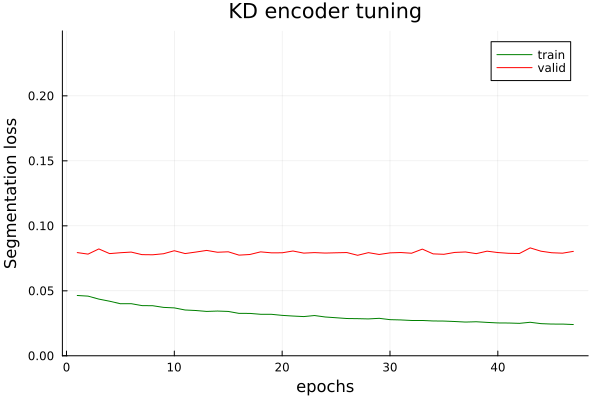

In [20]:
p = plot(tuning_trainloss, color=:green, label="train", linestyle=:solid)
plot!(tuning_validloss,    color=:red,   label="valid", linestyle=:solid)

plot!(legend=:topright)
title!("KD encoder tuning")
xlabel!("epochs")
ylabel!(ylabeltune)
ylims!(ylimstune)
display(p)
# savefig(p, "./kd-mobileunet-encoder-tuning.png")